In [113]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt

In [114]:
df = gpd.read_file("/Users/emretopalgokceli/PycharmProjects/pythonProject/turkey_gadm/gadm40_TUR_shp/gadm40_TUR_1.shp")[["COUNTRY","NAME_1","VARNAME_1","geometry"]]
df.head()

,COUNTRY,NAME_1,VARNAME_1,geometry
0,Turkey,Adana,Seyhan,"MULTIPOLYGON (((35.41434 36.58820, 35.41441 36..."
1,Turkey,Adiyaman,Adıyaman,"POLYGON ((38.10330 37.90240, 38.11007 37.90416..."
2,Turkey,Afyon,Afyonkarahisar,"POLYGON ((30.19456 37.87817, 30.20171 37.86722..."
3,Turkey,Agri,Ağri|Karaköse,"POLYGON ((43.10198 39.32246, 43.09510 39.32087..."
4,Turkey,Aksaray,None,"POLYGON ((33.24951 38.26498, 33.26122 38.27609..."


In [115]:
df.columns = ["Country", "City", "Dist", "geometry"]

In [116]:
df.head()

,Country,City,Dist,geometry
0,Turkey,Adana,Seyhan,"MULTIPOLYGON (((35.41434 36.58820, 35.41441 36..."
1,Turkey,Adiyaman,Adıyaman,"POLYGON ((38.10330 37.90240, 38.11007 37.90416..."
2,Turkey,Afyon,Afyonkarahisar,"POLYGON ((30.19456 37.87817, 30.20171 37.86722..."
3,Turkey,Agri,Ağri|Karaköse,"POLYGON ((43.10198 39.32246, 43.09510 39.32087..."
4,Turkey,Aksaray,None,"POLYGON ((33.24951 38.26498, 33.26122 38.27609..."


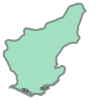

In [5]:
df.geometry[0]

In [37]:
df.City[6]

'Ankara'

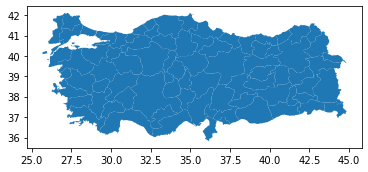

In [117]:
df.plot();

In [8]:
type(df)

geopandas.geodataframe.GeoDataFrame

Aşağıdaki komutla her ilin merkezi noktasını hesaplıyoruz. Bunu center ismiyle bir değişken olarak df'nin içine atayalım.

In [118]:
df.head()

,Country,City,Dist,geometry
0,Turkey,Adana,Seyhan,"MULTIPOLYGON (((35.41434 36.58820, 35.41441 36..."
1,Turkey,Adiyaman,Adıyaman,"POLYGON ((38.10330 37.90240, 38.11007 37.90416..."
2,Turkey,Afyon,Afyonkarahisar,"POLYGON ((30.19456 37.87817, 30.20171 37.86722..."
3,Turkey,Agri,Ağri|Karaköse,"POLYGON ((43.10198 39.32246, 43.09510 39.32087..."
4,Turkey,Aksaray,None,"POLYGON ((33.24951 38.26498, 33.26122 38.27609..."


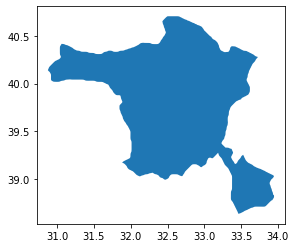

In [10]:
df[df["City"]=="Ankara"].plot(

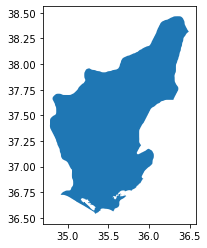

In [11]:
df[df["City"]=="Adana"].plot();

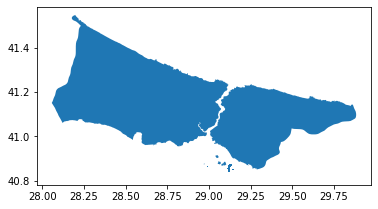

In [12]:
df[df["City"] == "Istanbul"].plot();

In [13]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
df_mercator = df.to_crs(epsg=3395)

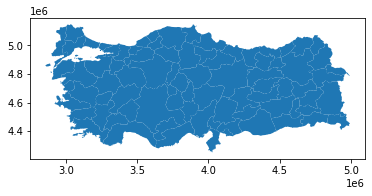

In [15]:
df_mercator.plot();

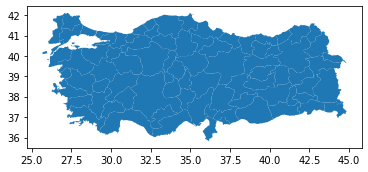

In [16]:
df.plot();

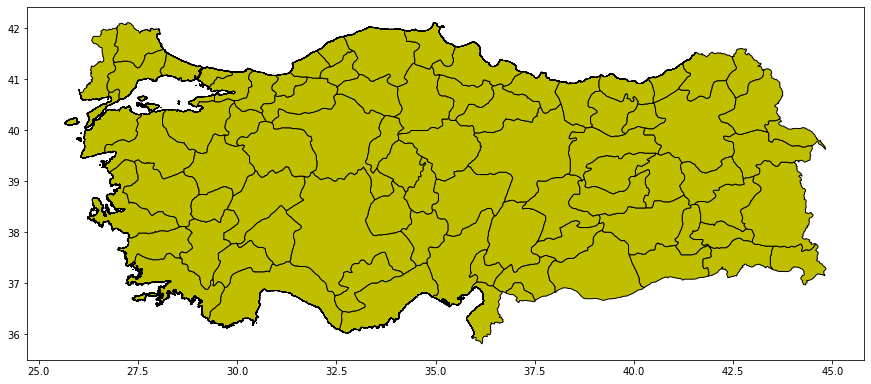

In [119]:
df.plot(edgecolor="k", facecolor="y", figsize=(15,10));

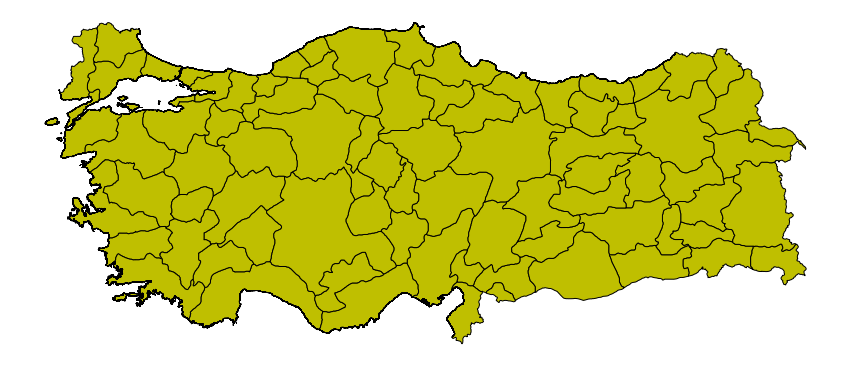

In [120]:
ax = df.plot(edgecolor="k", facecolor="y", figsize=(15,10));
ax.set_axis_off();

In [121]:
df2 = pd.read_excel("/Users/emretopalgokceli/Desktop/Data/GDPP_2020.xls")

In [122]:
df.head()

,Country,City,Dist,geometry
0,Turkey,Adana,Seyhan,"MULTIPOLYGON (((35.41434 36.58820, 35.41441 36..."
1,Turkey,Adiyaman,Adıyaman,"POLYGON ((38.10330 37.90240, 38.11007 37.90416..."
2,Turkey,Afyon,Afyonkarahisar,"POLYGON ((30.19456 37.87817, 30.20171 37.86722..."
3,Turkey,Agri,Ağri|Karaköse,"POLYGON ((43.10198 39.32246, 43.09510 39.32087..."
4,Turkey,Aksaray,None,"POLYGON ((33.24951 38.26498, 33.26122 38.27609..."


Veride eksik olmamasına rağmen dönüştürme işlemi sonunda bazı şehirleri yok gibi görüyordu. Steakoverflow'dan "Pandas merge result missing rows when joining on strings" sorusuna cevap olarak aşağıdakini kodu buldum. Sorun çözüldü.

In [125]:
df3 = pd.merge(df, df2)

In [126]:
df3.shape

(81, 5)

In [131]:
df3.head()

,Country,City,Dist,geometry,GDPP
0,Turkey,Adana,Seyhan,"MULTIPOLYGON (((35.41434 36.58820, 35.41441 36...",6269.664360
1,Turkey,Adiyaman,Adıyaman,"POLYGON ((38.10330 37.90240, 38.11007 37.90416...",3808.666715
2,Turkey,Afyon,Afyonkarahisar,"POLYGON ((30.19456 37.87817, 30.20171 37.86722...",5958.478414
3,Turkey,Agri,Ağri|Karaköse,"POLYGON ((43.10198 39.32246, 43.09510 39.32087...",3033.774675
4,Turkey,Aksaray,None,"POLYGON ((33.24951 38.26498, 33.26122 38.27609...",6891.185376


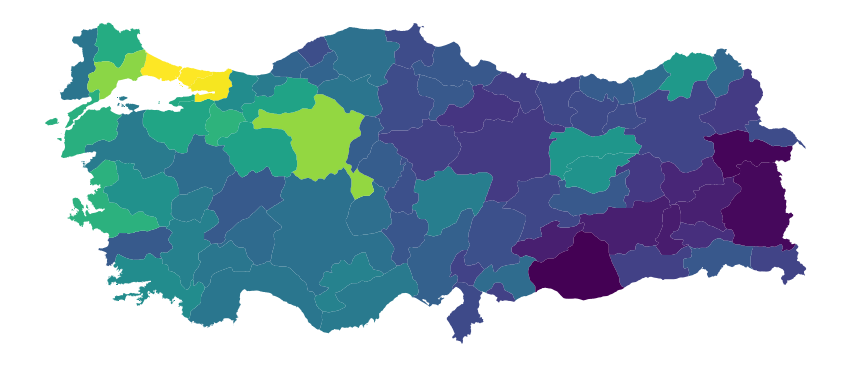

In [128]:
bx = df3.plot(figsize=(15,10), column="GDPP");
bx.set_axis_off();